In [1]:
import contextily as ctx

In [4]:
import featurization
import pandas as pd
import geopandas
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [3]:
import helpers
%load_ext autoreload
%autoreload 2

In [4]:
df = featurization.import_and_clean_data("all-sc-bike-data-1101.csv")
df = featurization.group_and_create_target(df)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2903: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/Users/katelynwalker/galvanize/other_projects/bike-share/featurization.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  idle_df.utc_time_end[missing_idle] = idle_df.utc_time_end.shift(-1)


In [5]:
df['geolocation'] = df.apply(lambda z: Point(z.lon, z.lat), axis=1)

In [6]:
geodf = geopandas.GeoDataFrame(df, geometry='geolocation')

In [20]:
w, s, e, n = geodf.total_bounds

In [21]:
w, s, e, n

(-122.08378, 36.93204, -121.76485, 37.01716)

In [7]:
geodf.crs = {'init': 'epsg:4326'}

In [8]:
geodf.crs

{'init': 'epsg:4326'}

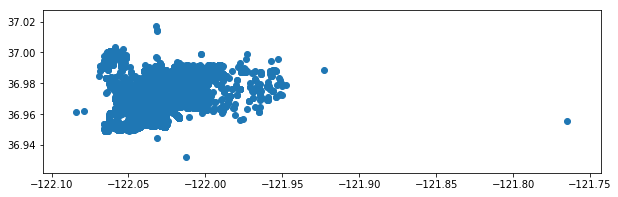

In [24]:
geodf.plot(figsize = (10,10))

In [25]:
ctx.howmany(w, s, e, n, 12, ll=True)

Using zoom level 12, this will download 10 tiles


10

In [26]:
img, ext = ctx.bounds2img(w, s, e, n, 12, ll=True)

In [27]:
geodf_bytime = geodf.copy()
geodf_bytime.sort_values('idle_time', inplace=True)

In [28]:
#drop the four bikes that sat for 3 days or more, just to improve the color ramp
geodf_bytime.drop([6460, 1662, 4011, 3168], axis=0, inplace=True)
#drop the bike that got taken to Watsonville
geodf_bytime.drop([6446], axis=0, inplace=True)

In [30]:
w, s, e, n = geodf_bytime.total_bounds
img, ext = ctx.bounds2img(w, s, e, n, 12, ll=True)

(-13599676.072498558, -13570324.25363705, 4422340.708467156, 4441908.58770816)

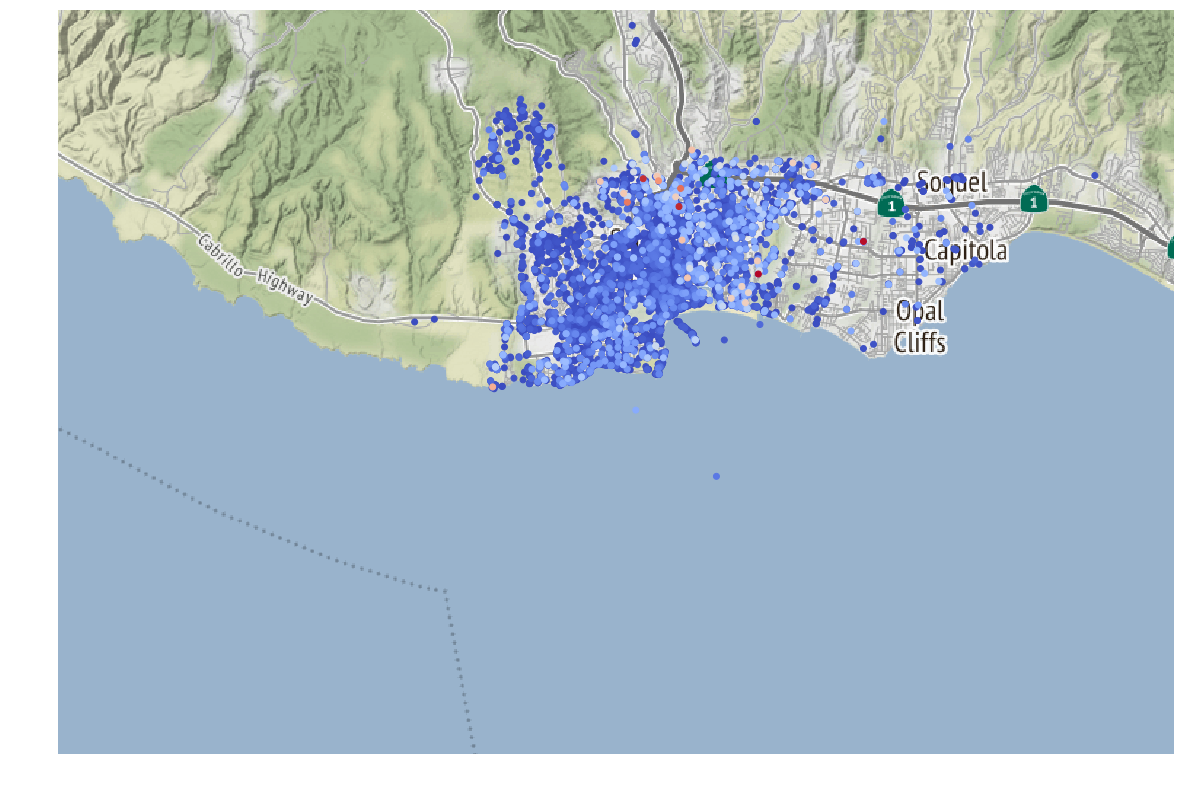

In [31]:
f, ax = plt.subplots(1, figsize=(20, 20))
ax.imshow(img, extent=ext)
geodf_bytime.to_crs(epsg=3857).plot(ax=ax, column='idle_time', cmap='coolwarm')
ax.axis('off')

In [12]:
geodf['next_action'] = 'rented'
geodf.loc[geodf['gets_pickedup_charged'], 'next_action'] = 'gets_pickedup_charged'
geodf.loc[geodf['gets_pickedup_not_charged'], 'next_action'] = 'gets_relocated'

In [13]:
one_bike = geodf[geodf['bike_id'] == 'bike_23366']

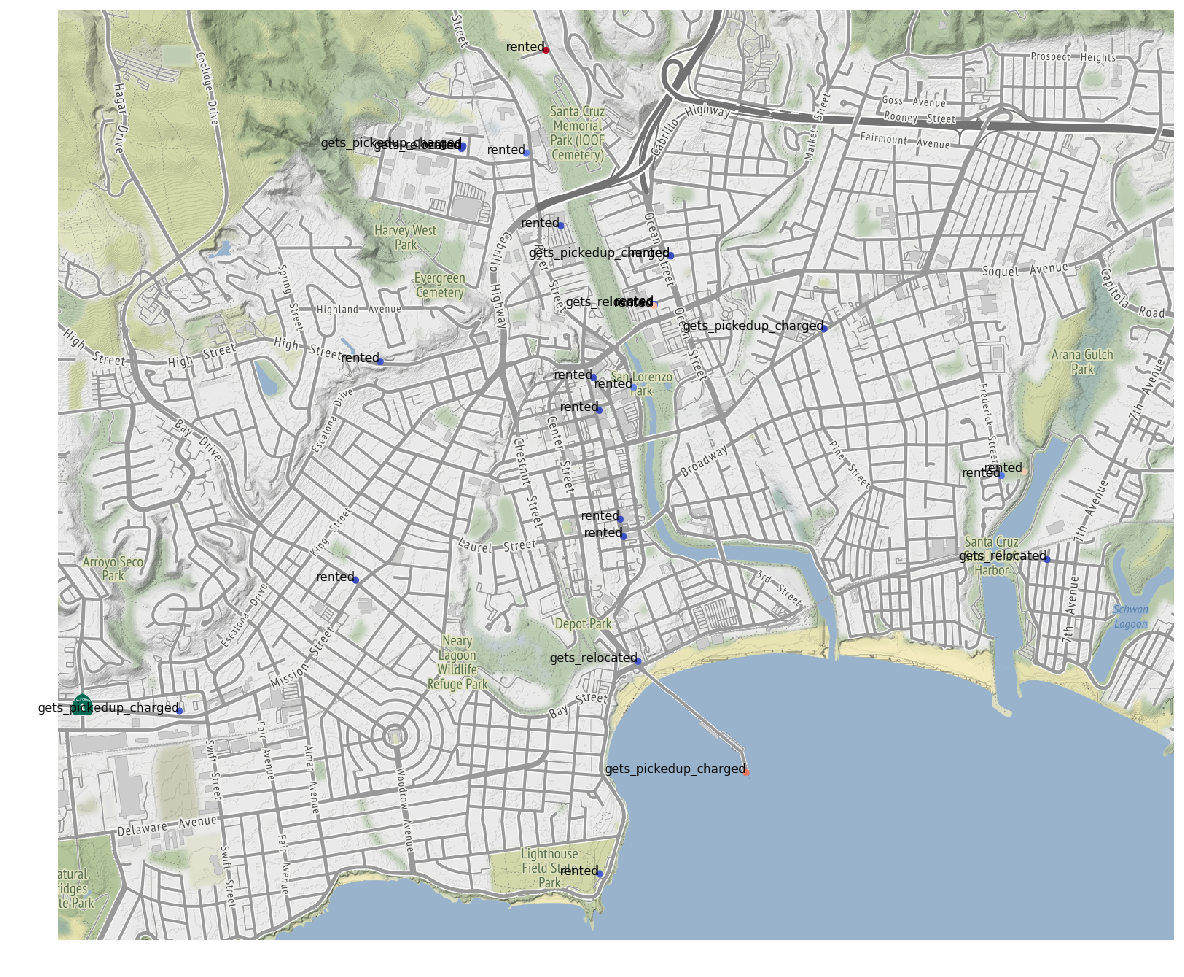

In [14]:
%matplotlib inline

w, s, e, n = one_bike.total_bounds
img, ext = ctx.bounds2img(w, s, e, n, 15, ll=True)
f, ax = plt.subplots(1, figsize=(20, 20))
ax.imshow(img, extent=ext)
new_crs_bike = one_bike.to_crs(epsg=3857)
new_crs_bike.plot(ax=ax, column='idle_time', cmap='coolwarm')
new_crs_bike.apply(lambda x: ax.annotate(s=x.next_action, xy=x.geolocation.centroid.coords[0], ha='right', size=12),axis=1);
#for idx, row in new_crs_bike.iterrows():
    #plt.annotate(s=row['next_action'], xy=row.geolocation.coords[0], horizontalalignment='center')
ax.axis('off')
plt.show()

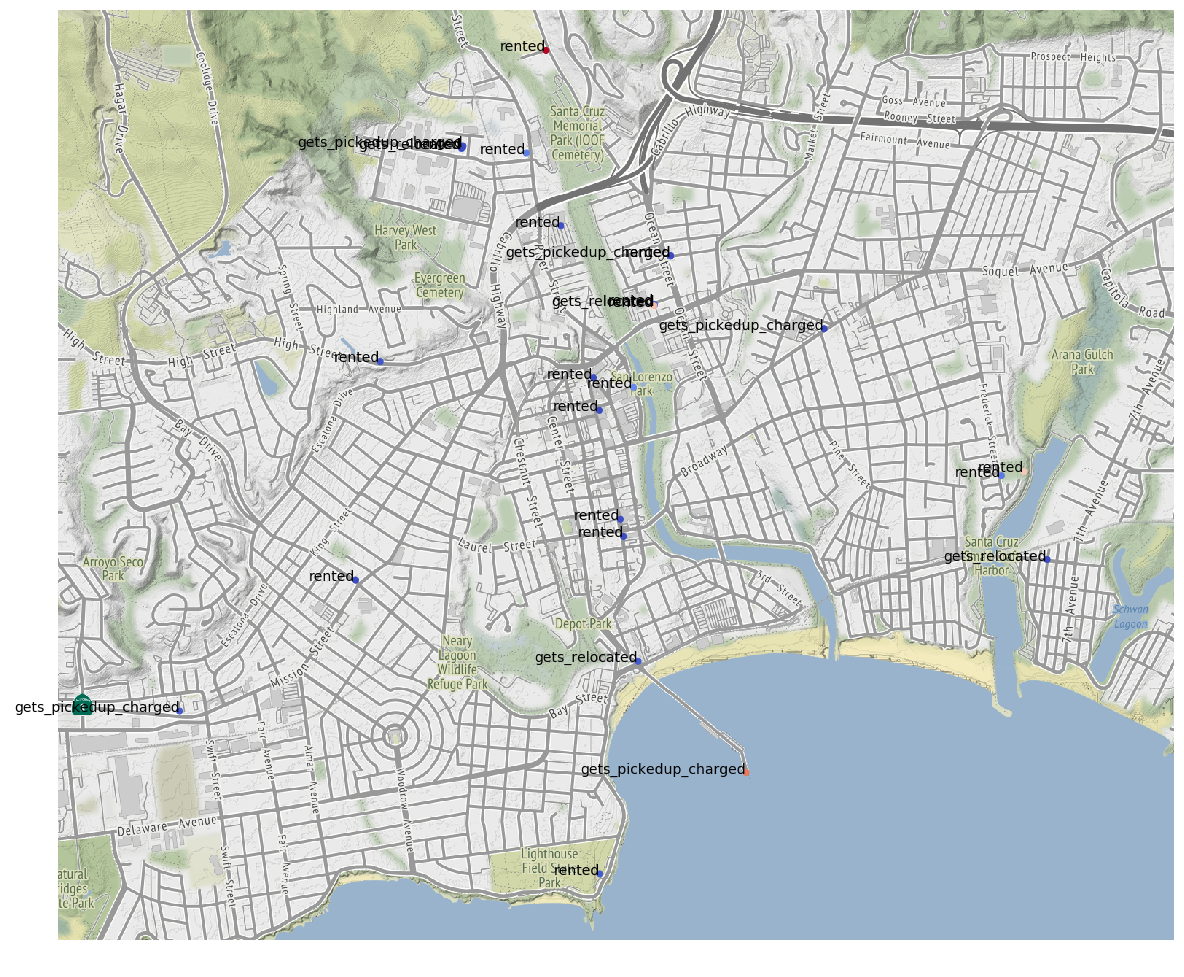

In [18]:
fig, ax = plt.subplots(1, figsize=(20, 20))
ax = helpers.map_bikes(ax, one_bike, 'idle_time', 'next_action', 15)
plt.show()

In [11]:
geodf = featurization.all_featurization("all-sc-bike-data-1101.csv")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [10]:
geodf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 10472 entries, 58 to 11380
Data columns (total 14 columns):
bike_id                      10472 non-null object
lat                          10472 non-null float64
lon                          10472 non-null float64
idle_time                    10472 non-null timedelta64[ns]
batt_start                   10472 non-null int64
batt_end                     10472 non-null int64
utc_time_start               10472 non-null datetime64[ns, UTC]
utc_time_end                 10472 non-null datetime64[ns, UTC]
local_time_start             10472 non-null datetime64[ns, America/Los_Angeles]
gets_pickedup_charged        10472 non-null bool
gets_pickedup_not_charged    10472 non-null bool
in_charger                   10472 non-null bool
next_action                  10472 non-null object
geolocation                  10472 non-null object
dtypes: bool(3), datetime64[ns, America/Los_Angeles](1), datetime64[ns, UTC](2), float64(2), int64(2), object(

In [ ]:
#without adjusting for bikes that barely move

(-13599676.072498558, -13550756.374396045, 4422340.708467156, 4441908.58770816)

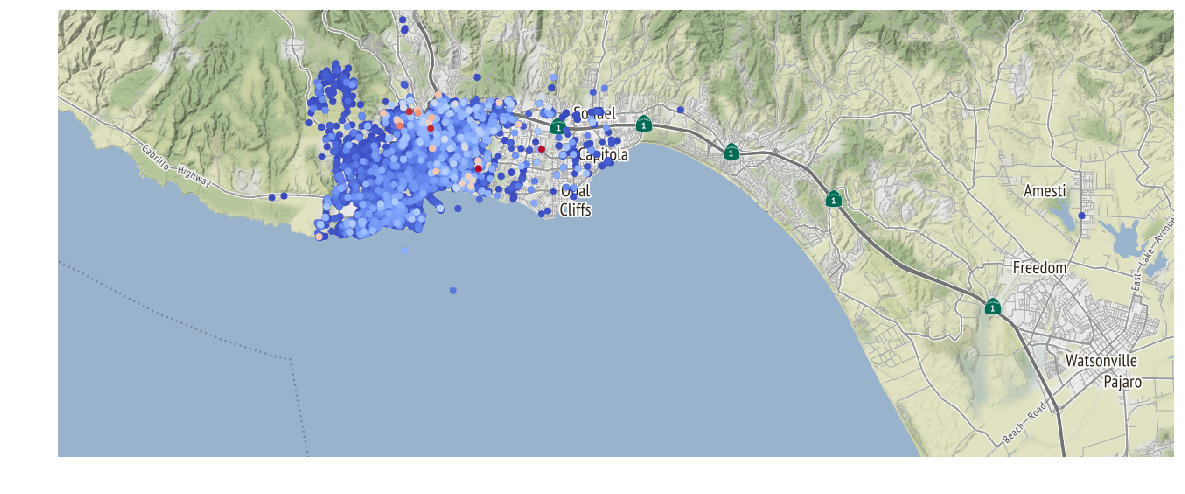

In [80]:
f, ax = plt.subplots(1, figsize=(20, 20))
ax.imshow(img, extent=ext)
geodf_bytime.to_crs(epsg=3857).plot(ax=ax, column='idle_time', cmap='coolwarm')
ax.axis('off')

In [70]:
geodf.describe()

lat           lon               idle_time    batt_start  \
count  11394.000000  11394.000000                   11394  11394.000000   
mean      36.972266   -122.027079  0 days 02:24:20.132087     60.147358   
std        0.010275      0.016917  0 days 05:26:49.457580     21.490158   
min       36.932040   -122.083780         0 days 00:00:00      2.000000   
25%       36.965153   -122.036120  0 days 00:04:15.250000     42.000000   
50%       36.971750   -122.026420         0 days 00:32:20     60.000000   
75%       36.979318   -122.019560  0 days 02:01:36.750000     78.000000   
max       37.017160   -121.764850         7 days 14:14:31    100.000000   

           batt_end  
count  11394.000000  
mean      59.978936  
std       21.470093  
min        2.000000  
25%       42.000000  
50%       60.000000  
75%       78.000000  
max      100.000000